In [89]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_rows",21)
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# Project
## Fitness Tracker Analysis 

In [90]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\random_fitness_dataset.csv")

# Data Info

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        200 non-null    int64  
 1   timestamp        200 non-null    object 
 2   user_id          200 non-null    object 
 3   age              200 non-null    int64  
 4   gender           200 non-null    object 
 5   activity_type    200 non-null    object 
 6   duration_min     200 non-null    int64  
 7   calories_burned  200 non-null    int64  
 8   heart_rate_avg   200 non-null    int64  
 9   steps            200 non-null    int64  
 10  sleep_hours      200 non-null    float64
 11  weight_kg        200 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 18.9+ KB


<Axes: >

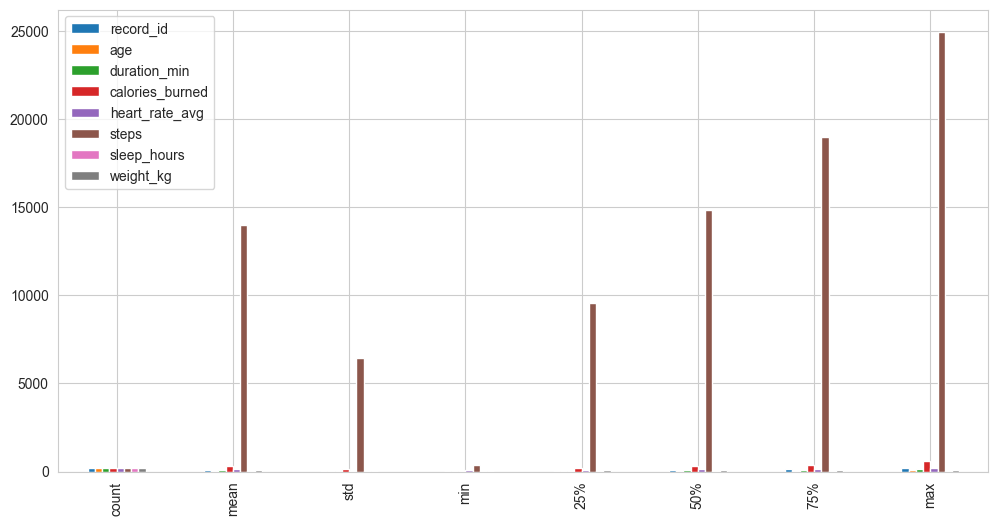

In [92]:
df.describe().plot(kind="bar",figsize=(12,6))

In [93]:
df.head()

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,7.0,84.3
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,5.7,79.6
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,6.6,88.3
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,7.9,69.0
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,5.0,61.6


# Data Handling & Cleaning

In [94]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [95]:
df.drop(columns=["user_id","timestamp","record_id"],inplace=True)

# EDA & Data Visualization

In [96]:
df.head()

,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg
0,67,Male,Cycling,7,322,175,3591,7.0,84.3
1,16,Female,Strength Training,83,265,113,22312,5.7,79.6
2,62,Female,Cycling,118,508,98,5418,6.6,88.3
3,56,Female,Swimming,75,270,150,19809,7.9,69.0
4,42,Other,Yoga,76,308,141,12562,5.0,61.6


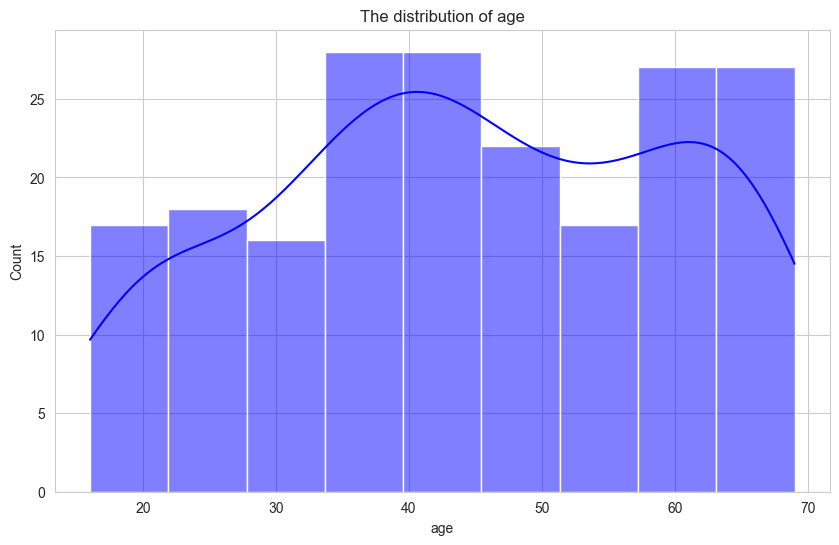

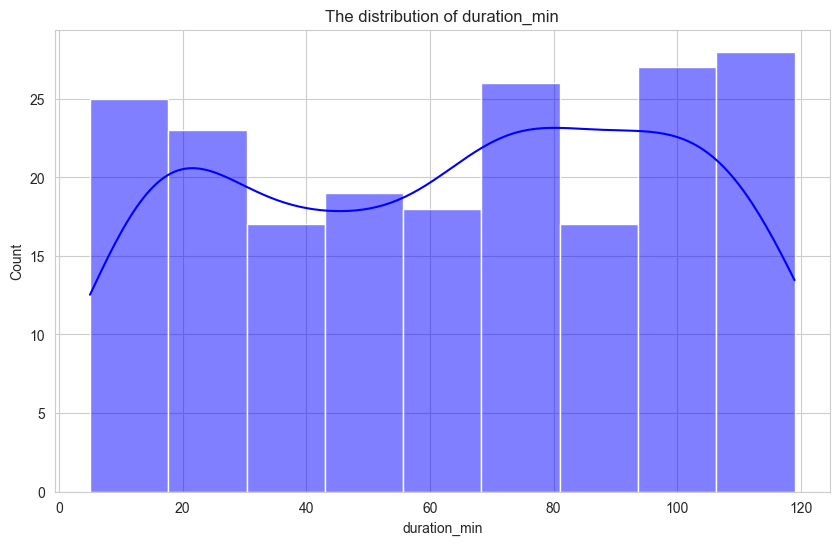

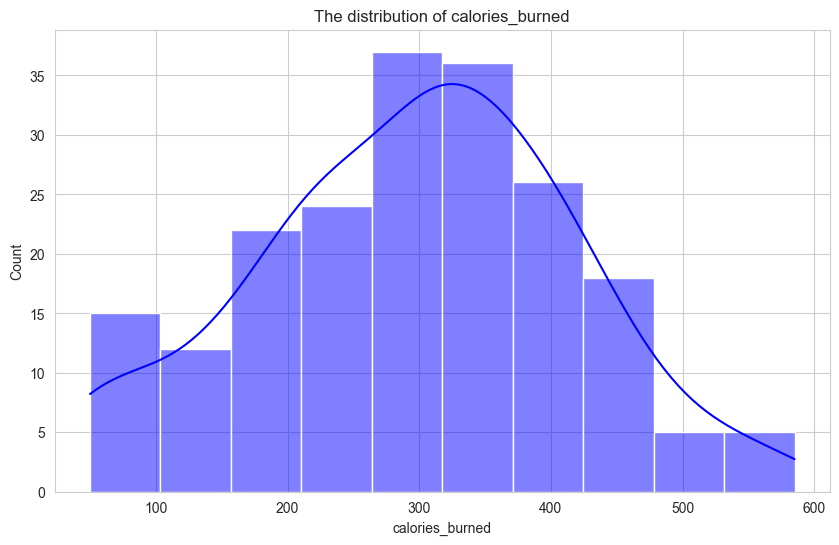

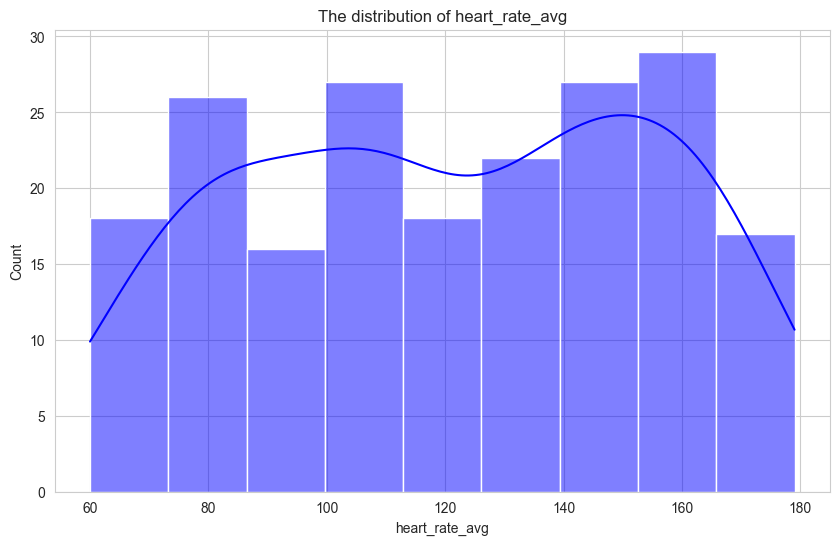

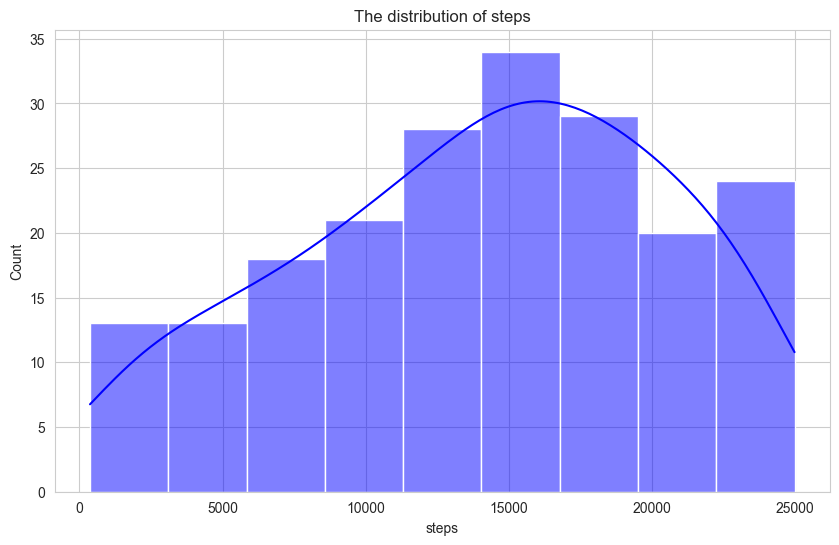

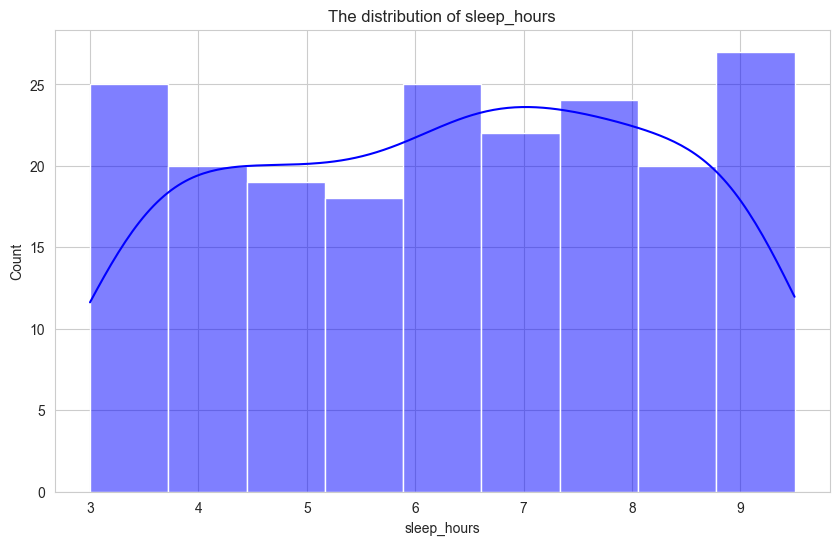

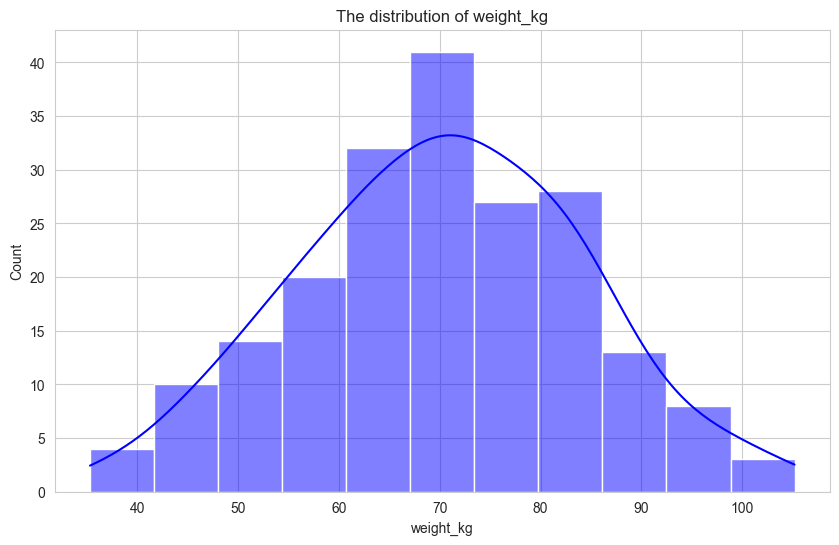

In [97]:
for col in df.select_dtypes(include="number"):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df,x=col,kde=True,color="blue")
    plt.title(f"The distribution of {col}")
    plt.show()

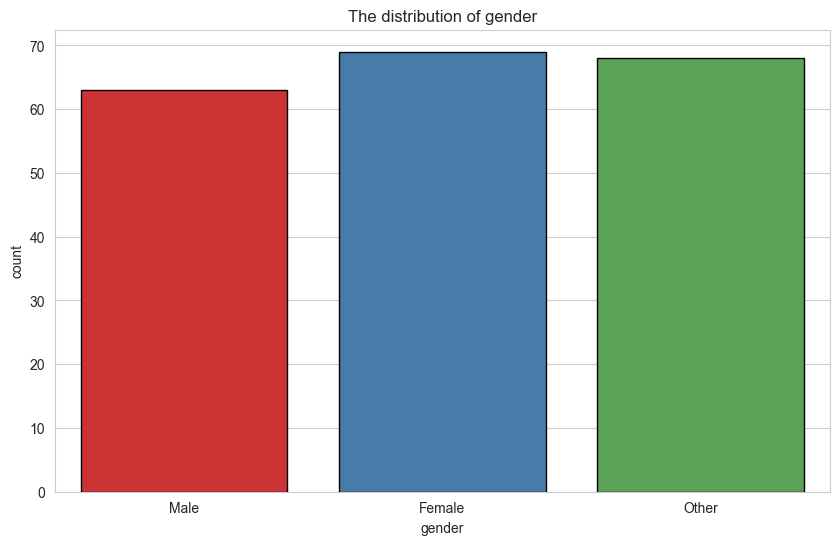

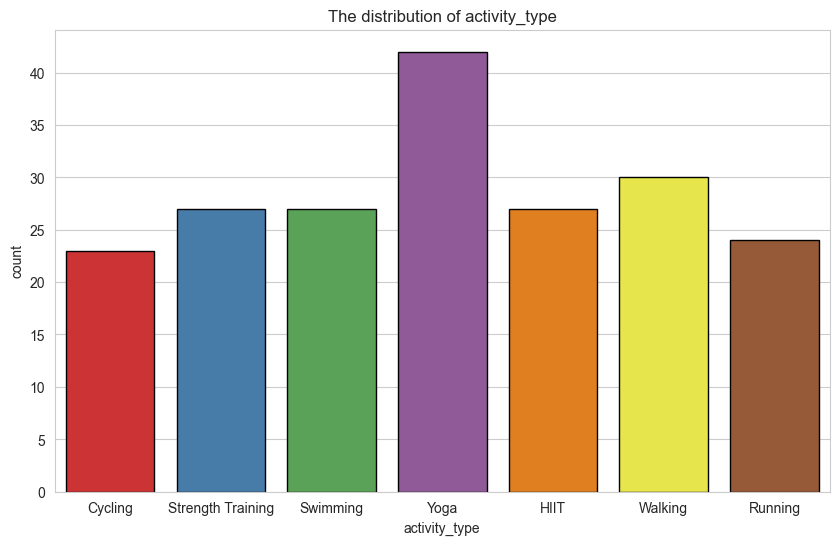

In [98]:
for col in df.select_dtypes(include="object"):
    plt.figure(figsize=(10,6))
    sns.countplot(data=df,x=col,palette="Set1",edgecolor="black")
    plt.title(f"The distribution of {col}")
    plt.show()

In [99]:
df.head()

,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg
0,67,Male,Cycling,7,322,175,3591,7.0,84.3
1,16,Female,Strength Training,83,265,113,22312,5.7,79.6
2,62,Female,Cycling,118,508,98,5418,6.6,88.3
3,56,Female,Swimming,75,270,150,19809,7.9,69.0
4,42,Other,Yoga,76,308,141,12562,5.0,61.6


In [ ]:
for col in df.select_dtypes(include='number'):
    print(f"{col}: {df[col].mean():.2f}")

age: 44.38
duration_min: 64.03
calories_burned: 295.76
heart_rate_avg: 120.94
steps: 14020.82
sleep_hours: 6.31
weight_kg: 70.15


## Which gender is more prone to do which exercise,what's their duration and how many calories they have burned ?

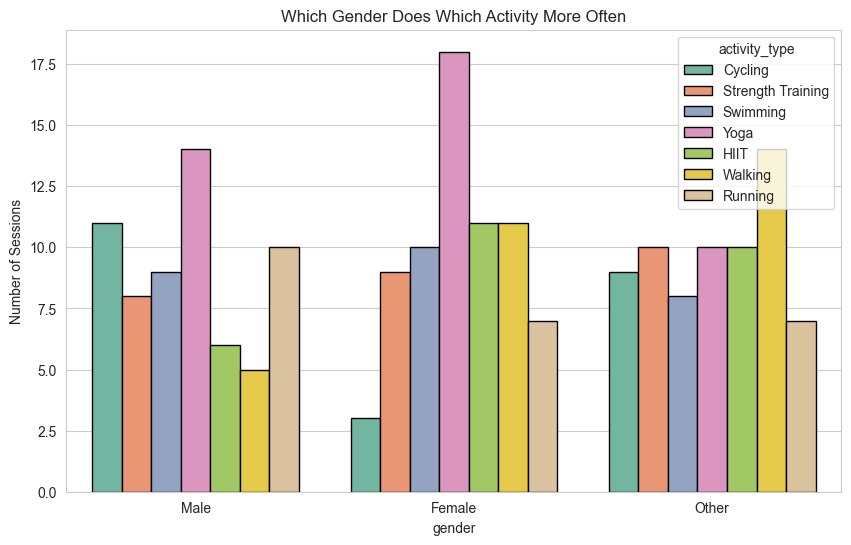

In [104]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="gender", hue="activity_type", palette="Set2", edgecolor="black")
plt.title("Which Gender Does Which Activity More Often")
plt.ylabel("Number of Sessions")
plt.show()


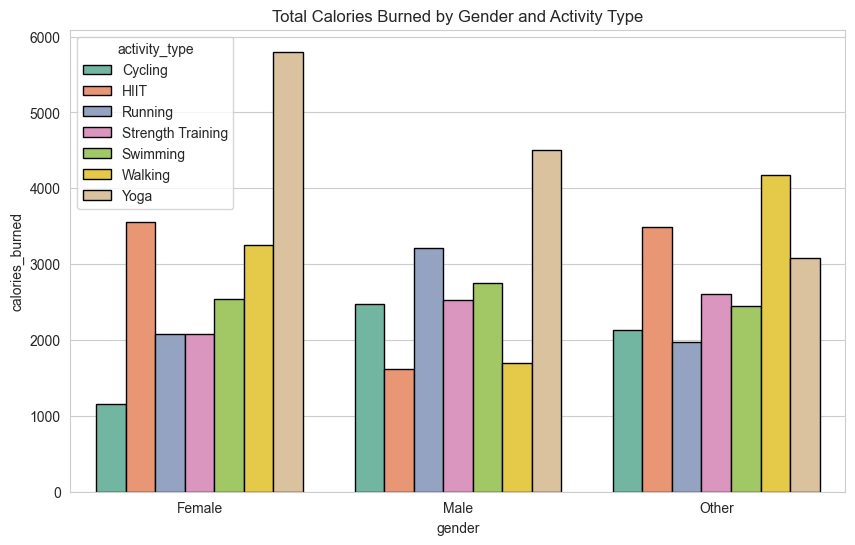

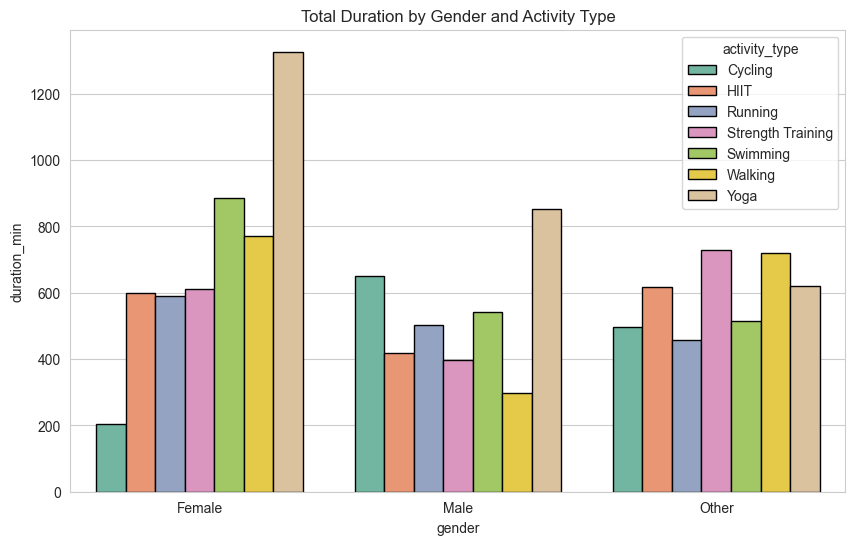

In [108]:
agg = df.groupby(['gender', 'activity_type'])[['duration_min', 'calories_burned']].sum().reset_index()

# Calories burned
plt.figure(figsize=(10,6))
sns.barplot(data=agg, x='gender', y='calories_burned', hue='activity_type', palette='Set2',edgecolor="black")
plt.title("Total Calories Burned by Gender and Activity Type")
plt.show()

# Duration
plt.figure(figsize=(10,6))
sns.barplot(data=agg, x='gender', y='duration_min', hue='activity_type', palette='Set2',edgecolor="black")
plt.title("Total Duration by Gender and Activity Type")
plt.show()


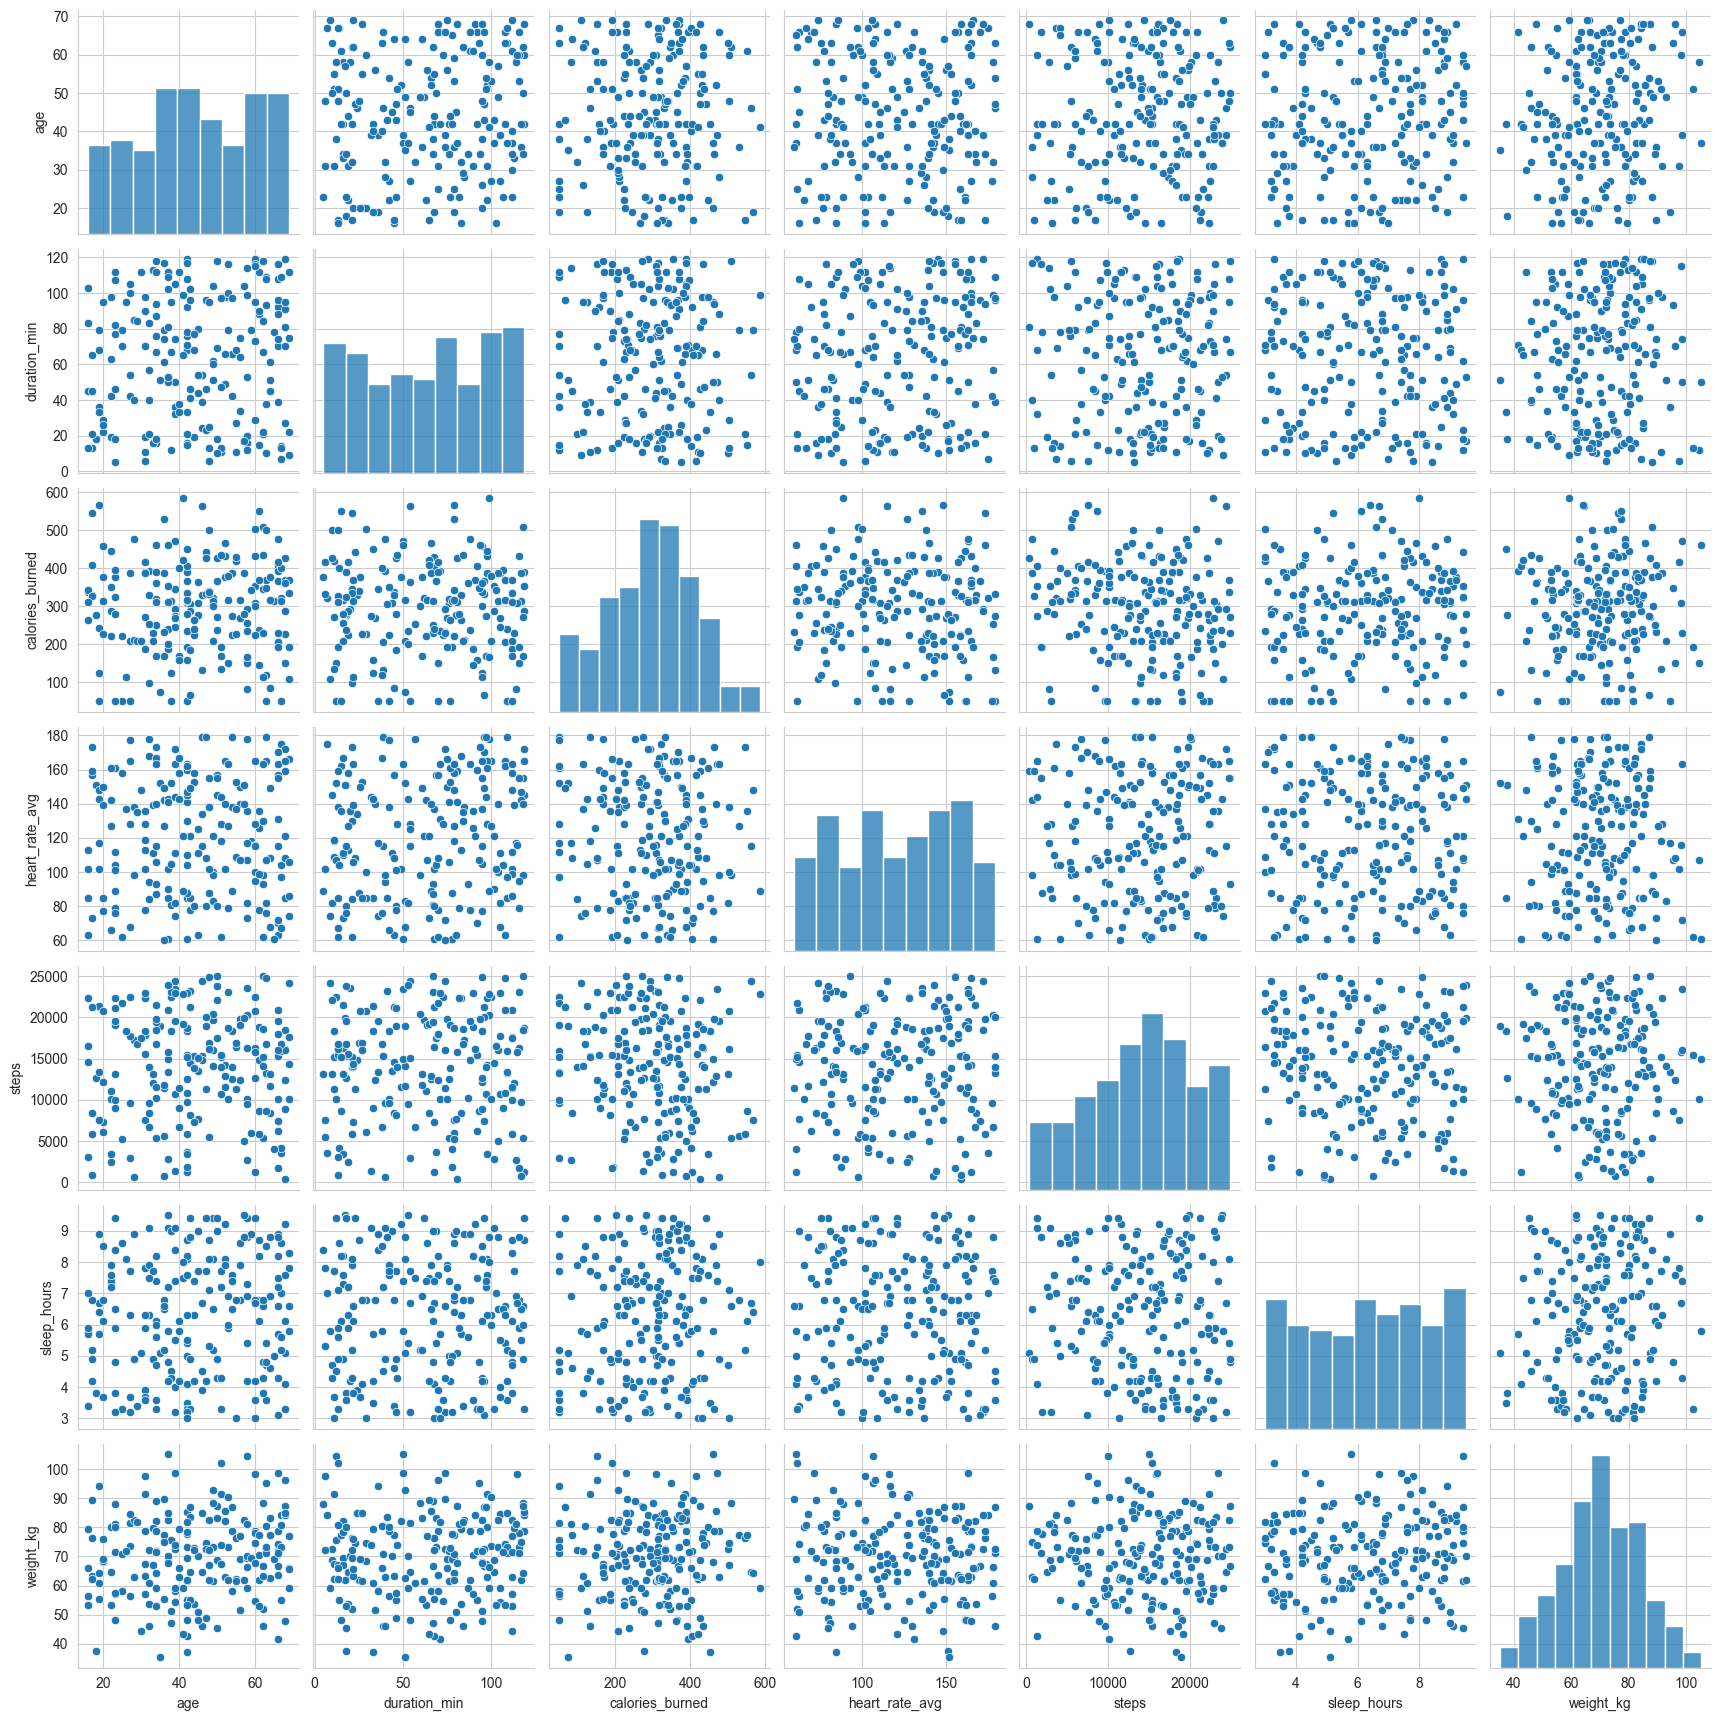

In [109]:
sns.pairplot(df)

In [112]:
df.head()

,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg
0,67,Male,Cycling,7,322,175,3591,7.0,84.3
1,16,Female,Strength Training,83,265,113,22312,5.7,79.6
2,62,Female,Cycling,118,508,98,5418,6.6,88.3
3,56,Female,Swimming,75,270,150,19809,7.9,69.0
4,42,Other,Yoga,76,308,141,12562,5.0,61.6


In [123]:
heart_rate=df.groupby(["activity_type","gender"])[["age","heart_rate_avg","weight_kg"]].mean().reset_index()
heart_rate.style.background_gradient(cmap="Reds")

,activity_type,gender,age,heart_rate_avg,weight_kg
0,Cycling,Female,51.000000,89.000000,80.033333
1,Cycling,Male,42.545455,117.545455,69.336364
2,Cycling,Other,47.444444,119.888889,68.611111
3,HIIT,Female,42.818182,113.363636,77.736364
4,HIIT,Male,44.000000,112.500000,60.966667
5,HIIT,Other,38.900000,127.500000,63.390000
6,Running,Female,41.714286,120.714286,70.600000
7,Running,Male,45.000000,121.900000,73.120000
8,Running,Other,37.142857,124.857143,60.900000
9,Strength Training,Female,44.333333,124.333333,70.800000


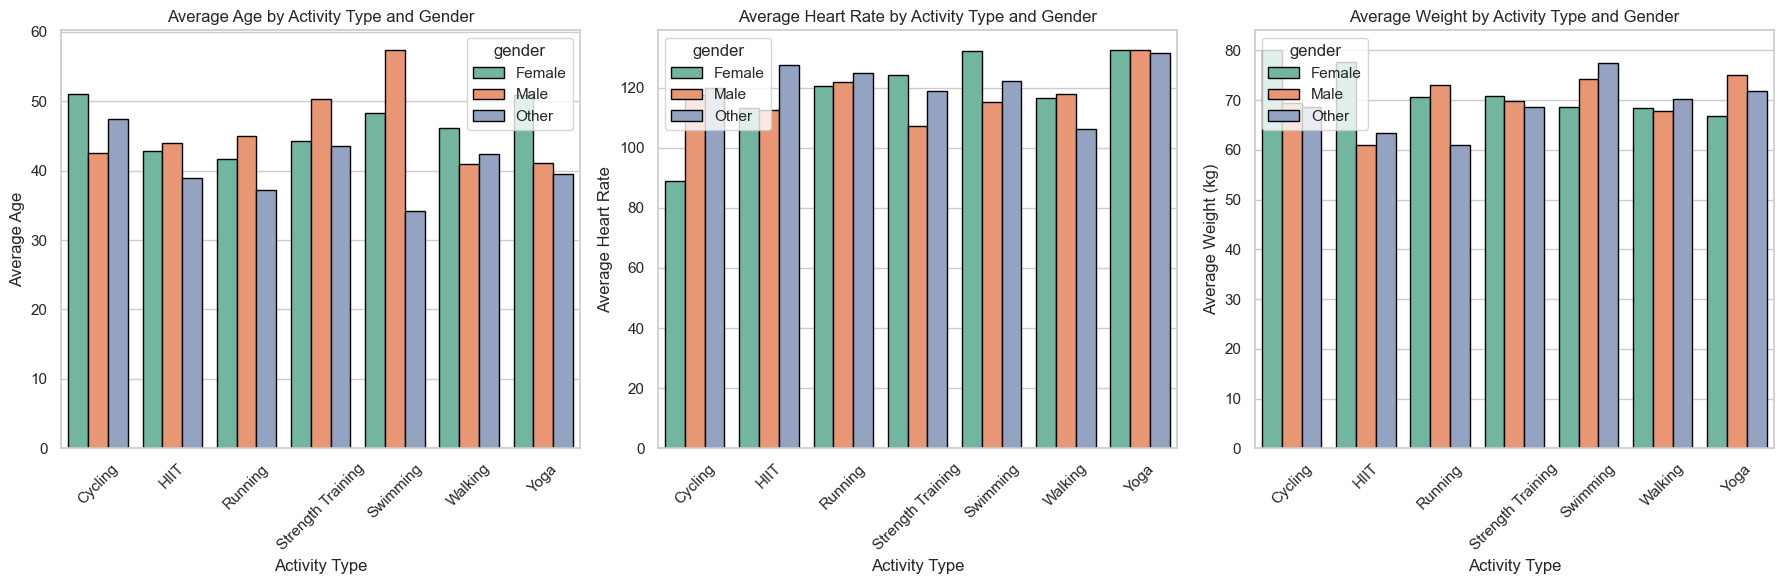

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# 3 subplots for age, heart rate, and weight
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Average Age
sns.barplot(data=heart_rate, x="activity_type", y="age", hue="gender",
            palette="Set2", edgecolor="black", ax=axes[0])
axes[0].set_title("Average Age by Activity Type and Gender")
axes[0].set_xlabel("Activity Type")
axes[0].set_ylabel("Average Age")
axes[0].tick_params(axis='x', rotation=45)

# Average Heart Rate
sns.barplot(data=heart_rate, x="activity_type", y="heart_rate_avg", hue="gender",
            palette="Set2", edgecolor="black", ax=axes[1])
axes[1].set_title("Average Heart Rate by Activity Type and Gender")
axes[1].set_xlabel("Activity Type")
axes[1].set_ylabel("Average Heart Rate")
axes[1].tick_params(axis='x', rotation=45)

# Average Weight
sns.barplot(data=heart_rate, x="activity_type", y="weight_kg", hue="gender",
            palette="Set2", edgecolor="black", ax=axes[2])
axes[2].set_title("Average Weight by Activity Type and Gender")
axes[2].set_xlabel("Activity Type")
axes[2].set_ylabel("Average Weight (kg)")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


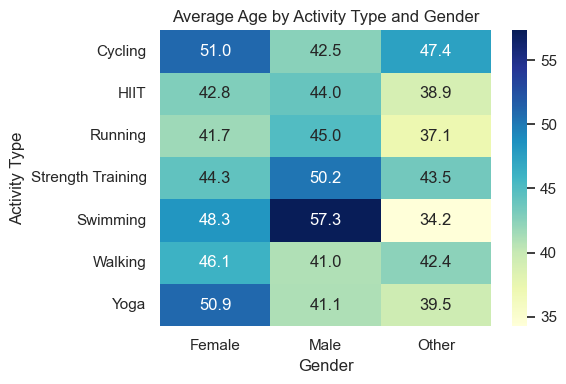

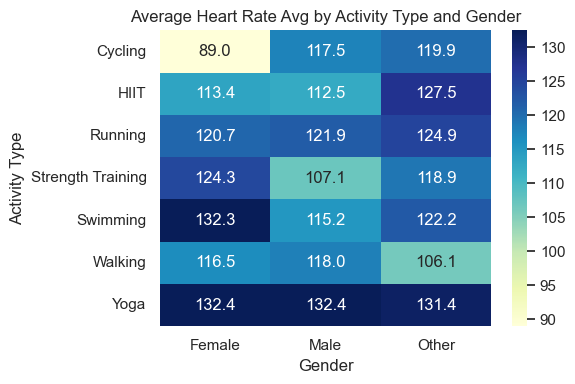

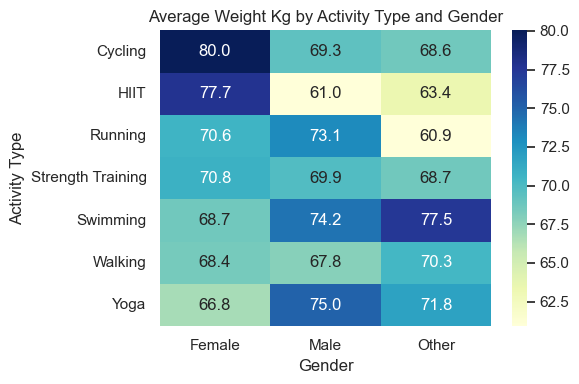

In [125]:
metrics = ["age", "heart_rate_avg", "weight_kg"]

for metric in metrics:
    pivot = heart_rate.pivot(index="activity_type", columns="gender", values=metric)
    plt.figure(figsize=(6, 4))
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
    plt.title(f"Average {metric.replace('_',' ').title()} by Activity Type and Gender")
    plt.xlabel("Gender")
    plt.ylabel("Activity Type")
    plt.tight_layout()
    plt.show()


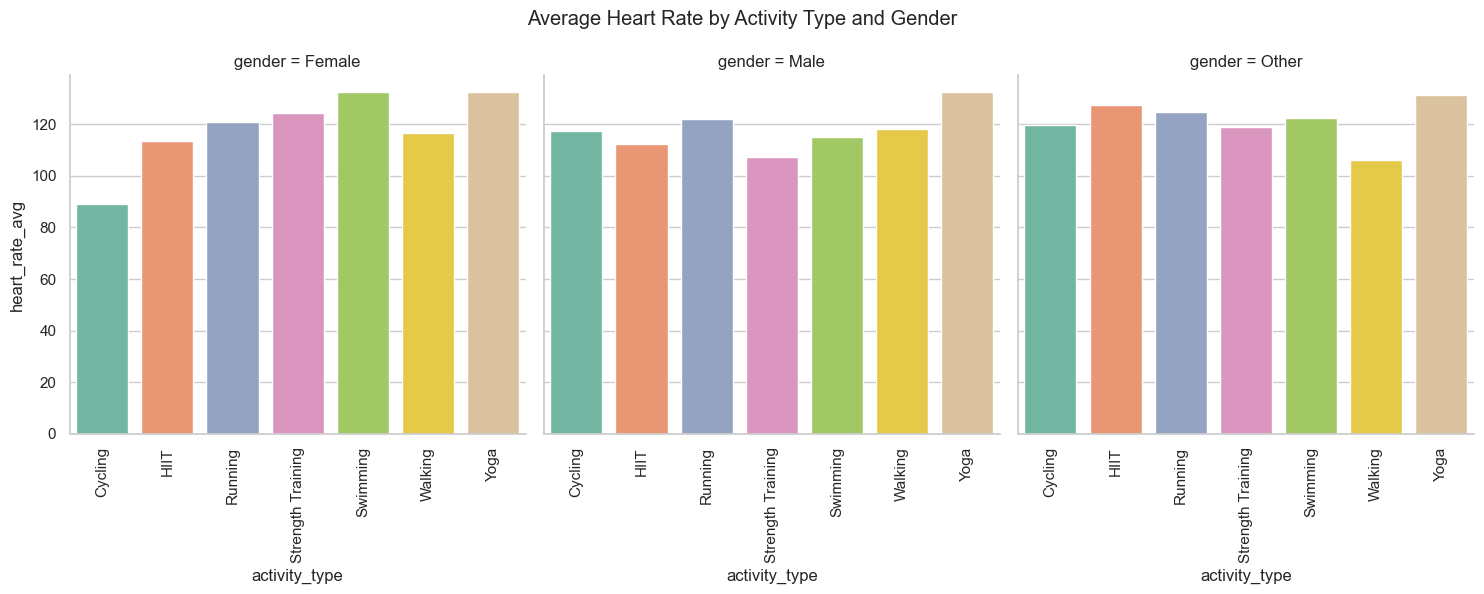

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the FacetGrid
g = sns.catplot(data=heart_rate, x="activity_type", y="heart_rate_avg", col="gender",
                kind="bar", palette="Set2", height=5, aspect=1)

# Adjust layout and add title
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Average Heart Rate by Activity Type and Gender")

# Rotate x-axis labels for all subplots
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()



Text(0.5, 1.0, 'Correlation Heatmap')

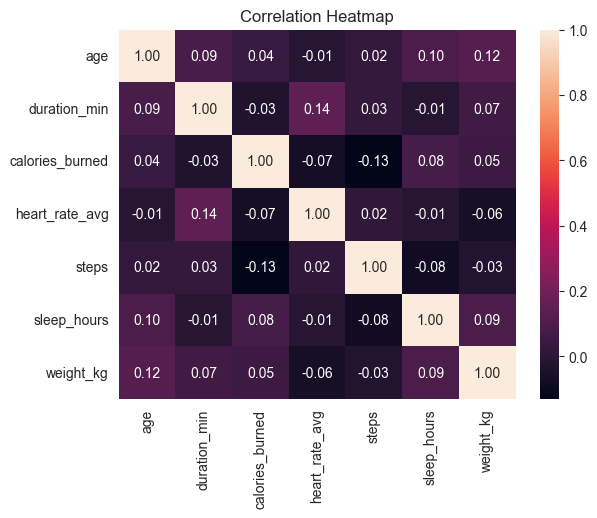

In [ ]:
cor=df.select_dtypes(include="number").corr()
sns.heatmap(data=cor,annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()